##  파산한 은행 데이타집합에서 분기별 은행수를 계산하기


    1. 먼저 데이타 구조를 파악하기

    2. 'Closing Date' 날짜 항목을 datetime 오브젝트로 변기하기

    3. 'Closing Date' 날짜 정보에서 dt 접근자를 이용하여 연도(year)와 분기(quarter)를 구하기

    4.  연도별 파산은행 수 구하기

    5. 연도별, 분기별 파산은행 수 구하기

    6. 정보 시각화
    
    
    [도서] Do it 데이타분석을 위한 판다스 입문

In [34]:
import pandas as pd

banks = pd.read_csv('./data/banklist.csv')
banks.head()


,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,15-Dec-17,20-Dec-17
1,The Farmers and Merchants State Bank of Argonia,Argonia,KS,17719,Conway Bank,13-Oct-17,20-Oct-17
2,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",26-May-17,26-Jul-17
3,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,5-May-17,26-Jul-17
4,First NBC Bank,New Orleans,LA,58302,Whitney Bank,28-Apr-17,5-Dec-17


### (1) 먼저 데이타 구조를 파악하기

In [6]:
banks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Bank Name              555 non-null    object        
 1   City                   555 non-null    object        
 2   ST                     555 non-null    object        
 3   CERT                   555 non-null    int64         
 4   Acquiring Institution  555 non-null    object        
 5   Closing Date           555 non-null    datetime64[ns]
 6   Updated Date           555 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 30.5+ KB


###  (2) Closing Date를 datetime 오브젝트로 변경

In [38]:
banks['Closing Date']=pd.to_datetime(banks['Closing Date'])


###  (3) 날짜 정보에서 dt 접근자를 이용하여 연도(year)와 분기(quarter)를 구한다

In [49]:
banks['Closing Date'].dt.year
banks['Closing Date'].dt.quarter
banks['Closing Date']

0     2017-12-15
1     2017-10-13
2     2017-05-26
3     2017-05-05
4     2017-04-28
         ...    
550   2001-07-27
551   2001-05-03
552   2001-02-02
553   2000-12-14
554   2000-10-13
Name: Closing Date, Length: 555, dtype: datetime64[ns]

###  (4) 연도별 파산은행 수 구하기

In [64]:
year_count = pd.DataFrame(banks['Closing Date'].dt.year.value_counts().sort_index())
year_count


,Closing Date
2000,2
2001,4
2002,11
2003,3
2004,4
2007,3
2008,25
2009,140
2010,157
2011,92


###  (5) 연도별, 분기별 파산은행 수 구하기

In [69]:
counts = pd.DataFrame(banks.groupby([banks['Closing Date'].dt.year, banks['Closing Date'].dt.quarter]).size())
# counts.reset_index().rename(columns={"index":"quarter"})
counts



0
Closing Date Closing Date    
2000         4              2
2001         1              1
             2              1
             3              2
2002         1              6
             2              2
             3              1
             4              2
2003         1              1
             2              1
             4              1
2004         1              3
             2              1
2007         1              1
             3              1
             4              1
2008         1              2
             2              2
             3              9
             4             12
2009         1             21
             2             24
             3             50
             4             45
2010         1             41
             2             45
             3             41
             4             30
2011         1             26
             2             22
             3             26
             4             18
2012         1             16
             2             15
             3             12
             4              8
2013         1              4
             2             12
             3              6
             4              2
2014         1              5
             2              7
             3              2
             4              4
2015         1              4
             2              1
             3              1
             4              2
2016         1              1
             2              2
             3              2
2017         1              3
             2              3
             4              2

### (6) 과를 시각화 ( 간단하게 )


<AxesSubplot:>

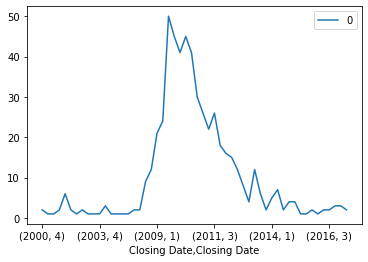

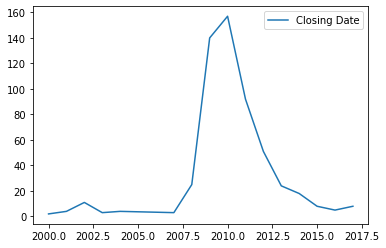

In [75]:
counts.plot()
year_count.plot()